# secretary problem

Let's first find the expected amount of perfect choices given n and r using a random process of 1000 trials:

In [103]:
import random
import math

# Choosing parameters
n = 10
trials = 1000
r = round(n / math.e)

# Initializing variables
secretary_scores = [*range(0, n)]
results = []
perfect_choice_counter = 0


for trial in range(0, trials):
    highest_so_far = 0
    random.shuffle(secretary_scores)
    secretaries_left = secretary_scores.copy()

    # Conducting the first r-1 interview to set the threshold:
    for secretary_score in range(0, 3):
        score = secretaries_left.pop(1)
        if score > highest_so_far:
            highest_so_far = score
    
    # After these interviews, choose the next best secretary:
    try:
        while True:
            secretary_score = secretaries_left.pop(0)

            if secretary_score > highest_so_far:
                choice = secretary_score
                if choice == n-1:
                    perfect_choice_counter += 1
                break
    except:
        choice = secretary_score

print(f'In {trials} trials, we have found the perfect candidate in {100 * perfect_choice_counter / trials}% of the time')

    


In 1000 trials, we have found the perfect candidate in 39.3% of the time


Now, let's use this code to find the ideal r score:

4
40.44


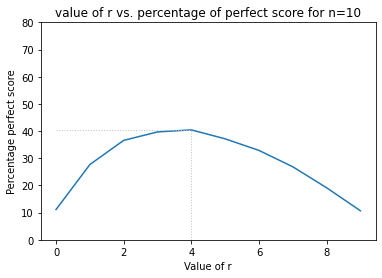

In [159]:
import random
import math
import matplotlib.pyplot as plt

def plot_r_against_perfect_percentage(n, trials, show_highest = False, color = False):
    list_of_results = []
    step_size = int(round(max(n/200, 1), 0))
    r_choices = [*range(0, n, step_size)]

    for r in r_choices:
        # Initializing variables
        secretary_scores = [*range(0, n)]
        perfect_choice_counter = 0


        for trial in range(0, trials):
            highest_so_far = 0
            random.shuffle(secretary_scores)
            secretaries_left = secretary_scores.copy()

            # Conducting the first r-1 interview to set the threshold:
            for secretary_score in range(0, r):
                score = secretaries_left.pop(1)
                if score > highest_so_far:
                    highest_so_far = score
            
            # After these interviews, choose the next best secretary:
            try:
                while True:
                    secretary_score = secretaries_left.pop(0)

                    if secretary_score > highest_so_far:
                        choice = secretary_score
                        if choice == n-1:
                            perfect_choice_counter += 1
                        break
            except:
                choice = secretary_score

        percentage = 100 * perfect_choice_counter / trials
        list_of_results.append(percentage)

    if color == False:
        plt.plot(r_choices, list_of_results)
    else:
        plt.plot(r_choices, list_of_results, color = color, label = f'Aiming for the perfect candidate')

    if show_highest:
        if not color:
            color = 'silver'
        highest = max(list_of_results)
        r_value = list_of_results.index(highest) * step_size
        
        print(r_value)
        print(highest)

        plt.plot((r_value, r_value), (0, highest), linewidth=1, color = color, linestyle = ":")
        plt.plot((0, r_value), (highest, highest), linewidth=1, color = color, linestyle = ":")


plt.xlabel('Value of r')
plt.ylabel('Percentage perfect score')
plt.ylim((0, 80))
plt.title(f'value of r vs. percentage of perfect score for n={10}')
plot_r_against_perfect_percentage(10, 10000, show_highest = True)

plt.show()

Now, let's do the same again but for *good enough* instead of *perfect* scores

In [2]:
import random
import math
import matplotlib.pyplot as plt

# First, setting the parameters:
n = 10
trials = 10000

def plot_r_against_good_enough_percentage(n, trials, good_enough_threshold, show_highest = False, color = False):
    list_of_results = []
    step_size = int(round(max(n/200, 1), 0))

    r_choices = [*range(1, n, step_size)]

    for r in r_choices:
        # Initializing variables
        secretary_scores = [*range(0, n)]
        good_enough_counter = 0


        for trial in range(0, trials):
            highest_so_far = 0
            random.shuffle(secretary_scores)
            secretaries_left = secretary_scores.copy()

            # Conducting the first r-1 interview to set the threshold:
            for secretary_score in range(0, r):
                score = secretaries_left.pop(1)
                if score > highest_so_far:
                    highest_so_far = score
            
            # After these interviews, choose the next best secretary:
            try:
                while True:
                    secretary_score = secretaries_left.pop(0)

                    if secretary_score > highest_so_far:
                        choice = secretary_score
                        if choice > good_enough_threshold * (n-1):
                            good_enough_counter += 1
                        break
            except:
                choice = secretary_score
            
        percentage = 100 * good_enough_counter / trials
        list_of_results.append(percentage)

    if color == False:
        plt.plot(r_choices, list_of_results, label = f'Aiming for sufficient candidates ({100*good_enough_threshold}% of candidates)')
    else:
        plt.plot(r_choices, list_of_results, color = color, label = f'Aiming for top {round(100 - 100*good_enough_threshold)}% of candidates')

    if show_highest:
        if not color:
            color = 'silver'
        highest = max(list_of_results)
        r_value = list_of_results.index(highest) * step_size

        print(r_value)
        print(highest)

        plt.plot((r_value, r_value), (0, highest), linewidth=1, color = color, linestyle = ":")
        plt.plot((0, r_value), (highest, highest), linewidth=1, color = color, linestyle = ":")


plt.figure(figsize = (12, 3))

plt.xlabel('Value of r')
plt.ylabel('Satisfaction percentage')
plt.ylim((0, 100))

plot_r_against_good_enough_percentage(n, trials, 0.8, True, 'r')
plot_r_against_perfect_percentage(n, trials, True, 'b')

plt.legend(bbox_to_anchor = (1.2,1), loc = 'upper right')
plt.title(f'r-value for n={n} with {trials} trials')
plt.subplots_adjust(right = 0.5)

plt.savefig('/mnt/c/users/olavg/OneDrive/Documenten/Statistics & Big Data/2021 - 02 - Mathematics & its Environment/Essay/figure_1', bbox_inches = 'tight')


Let's finally change r and see what happens:

212
42.6
16
96.6
22
94.4
46
91.0
96
72.8


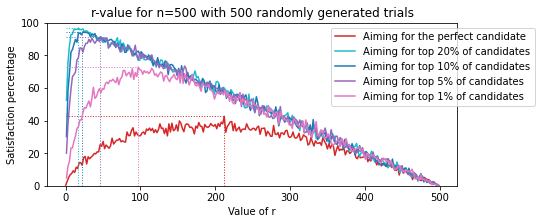

In [178]:
n = 500
trials = 500
color_list = ['tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink']

plt.figure(figsize = (12, 3))

plt.xlabel('Value of r')
plt.ylabel('Satisfaction percentage')
plt.ylim((0, 100))

plot_r_against_perfect_percentage(n, trials, True, 'tab:red')
plot_r_against_good_enough_percentage(n, trials, 0.8, True, color_list[0])
plot_r_against_good_enough_percentage(n, trials, 0.9, True, color_list[1])
plot_r_against_good_enough_percentage(n, trials, 0.95, True, color_list[2])
plot_r_against_good_enough_percentage(n, trials, 0.99, True, color_list[3])

plt.legend(bbox_to_anchor = (1.2,1), loc = 'upper right')
plt.title(f'r-value for n={n} with {trials} trials')
plt.subplots_adjust(right = 0.6)

plt.title(f'r-value for n={n} with {trials} randomly generated trials')

plt.savefig('/mnt/c/users/olavg/OneDrive/Documenten/Statistics & Big Data/2021 - 02 - Mathematics & its Environment/Essay/figure_2', bbox_inches = 'tight')

35
37.76
7
88.38
13
81.22
19
70.15


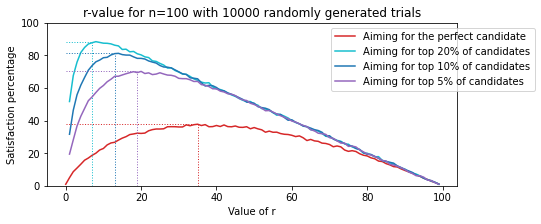

In [180]:
n = 100
trials = 10000
color_list = ['tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink']

plt.figure(figsize = (12, 3))

plt.xlabel('Value of r')
plt.ylabel('Satisfaction percentage')
plt.ylim((0, 100))

plot_r_against_perfect_percentage(n, trials, True, 'tab:red')
plot_r_against_good_enough_percentage(n, trials, 0.8, True, color_list[0])
plot_r_against_good_enough_percentage(n, trials, 0.9, True, color_list[1])
plot_r_against_good_enough_percentage(n, trials, 0.95, True, color_list[2])
# plot_r_against_good_enough_percentage(n, trials, 0.99, True, color_list[3])

plt.legend(bbox_to_anchor = (1.2,1), loc = 'upper right')
plt.title(f'r-value for n={n} with {trials} trials')
plt.subplots_adjust(right = 0.6)

plt.title(f'r-value for n={n} with {trials} randomly generated trials')

plt.savefig('/mnt/c/users/olavg/OneDrive/Documenten/Statistics & Big Data/2021 - 02 - Mathematics & its Environment/Essay/figure_3_(ii)', bbox_inches = 'tight')

32
52.53


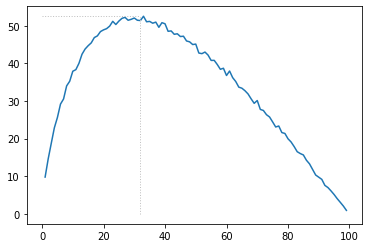

In [8]:
plot_r_against_good_enough_percentage(100, 10000, 0.98, True)